# ASIGNMENT 1

In [167]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
mpl.style.use(['ggplot'])
import datetime as datetime

%matplotlib inline

In [2]:
data_pelatihan = pd.read_excel('dataset/Feedback_Lat_2020.xlsx')

In [12]:
data_pelatihan.head(2)

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
data_pelatihan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nama Pelatihan                     1581 non-null   object 
 1   Objid Pelatihan                    1581 non-null   int64  
 2   Category                           1581 non-null   object 
 3   Tipe                               895 non-null    object 
 4   Lokasi Pelatihan                   1447 non-null   object 
 5   Provider                           1480 non-null   object 
 6   Academy Event                      1459 non-null   object 
 7   Location                           1514 non-null   object 
 8   Provider Category                  1239 non-null   object 
 9   Event Type                         1526 non-null   object 
 10  Status                             1519 non-null   object 
 11  Tgl Mulai                          1581 non-null   objec

In [234]:
data_pelatihan['Academy Event'] = data_pelatihan['Academy Event'].astype(str)

In [182]:
data_pelatihan['Tgl Mulai'] = pd.to_datetime(data_pelatihan['Tgl Mulai'])

In [190]:
data_pelatihan['Bulan'] = data_pelatihan['Tgl Mulai'].dt.month

# Area Plot

In [375]:
data_Ac = data_pelatihan[['JML Peserta','Academy Event', 'Bulan']]

In [379]:
data_Cons = data_Ac[data_Ac["Academy Event"].isin(['CONSUMER'])]

In [397]:
data_Cons.rename(columns={'JML Peserta':'Peserta Consumer'}, inplace=True)

In [398]:
data_Cons.head()

,Peserta Consumer,Academy Event,Bulan
15,0,CONSUMER,12
8,0,CONSUMER,12
58,20,CONSUMER,12
0,28,CONSUMER,12
11,15,CONSUMER,12


In [400]:
data_A = data_Cons.groupby('Bulan', axis=0)['Peserta Consumer'].sum()

In [401]:
data_A.head()

Bulan
1    158
2    984
3    220
4    174
5     35
Name: Peserta Consumer, dtype: int64

In [383]:
data_Ens = data_Ac[data_Ac["Academy Event"].isin(['ENTERPRISE'])]

In [403]:
data_Ens.rename(columns={'JML Peserta':'Peserta Enterprise'}, inplace=True)

In [404]:
data_Ens.head()

,Peserta Enterprise,Academy Event,Bulan
43,0,ENTERPRISE,12
33,0,ENTERPRISE,12
9,3,ENTERPRISE,12
53,178,ENTERPRISE,12
42,0,ENTERPRISE,12


In [406]:
data_B = data_Ens.groupby('Bulan', axis=0)['Peserta Enterprise'].sum()

In [407]:
data_B.head()

Bulan
1    134
2    137
3     74
4    396
5    311
Name: Peserta Enterprise, dtype: int64

In [408]:
data_Area = pd.concat([data_A, data_B], axis = 1, sort=False)

In [419]:
data_Area.head(12)

,Peserta Consumer,Peserta Enterprise
Bulan,,
1,158,134
2,984,137
3,220,74
4,174,396
5,35,311
6,424,133
7,926,1249
8,3646,1384
9,2569,2050


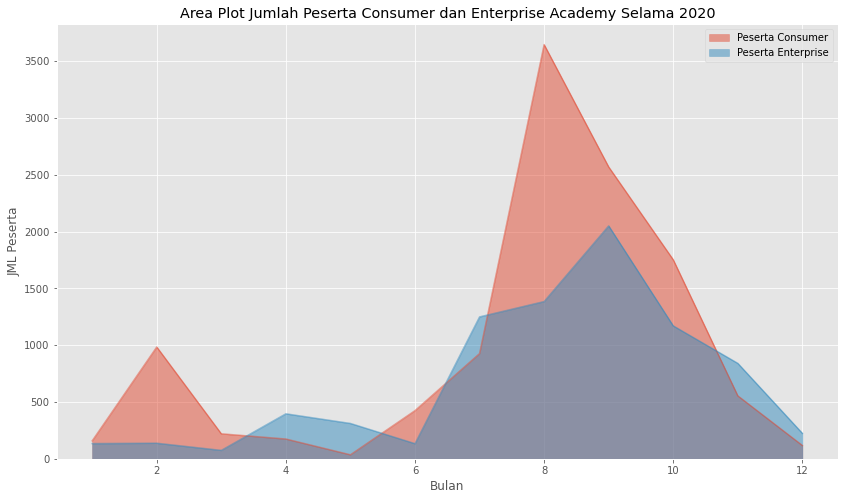

In [460]:
data_Area.plot(kind ='area', 
                stacked=False,
                figsize=(14, 8))


plt.title('Area Plot Jumlah Peserta Consumer dan Enterprise Academy Selama 2020')
plt.ylabel('JML Peserta')
plt.xlabel('Bulan')

plt.show()

#### Selama 2020, baik Enterprise Academy maupun Consumer Academy mencapai puncak penyelenggaraan pelatihan di Triwulan III khususnya pada bulan Agustus dan September. Pada Februari (TW I), Consumer Academy telah lebih aktif melakukan pemanggilan dibandingkan Enterprise Academy. Sebaliknya, pada April (TW II), Enterprise Academy memanggil lebih banyak peserta pelatihan dibanding Consumer Academy.

# Histogram

In [438]:
data_NITS = data_pelatihan[data_pelatihan["Academy Event"].isin(['NITS'])]

In [439]:
data_NITS.head()

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score,Bulan
51,Persiapan Kelas Data Center & Cloud Computing,90004540,NON LAT,Pengembangan Materi,Bandung,Learning Area 3 / LO Bandung,NITS,Online (Lokasi Masing-Masing),Internal,Internal,...,0.00,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,12
26,CDCP(Certified Data Centre Professional),80114251,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,90.00,0,91.20,86.00,88.50,80.00,88.4,92.00,88.40,12
44,ITIL Foundation,80113993,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,82.86,0,86.29,71.43,85.00,71.43,80.0,85.71,84.86,12
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.00,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,12
31,Data Center & Cloud Computing,80114200,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Internal,...,85.28,0,88.26,0.00,87.57,69.44,87.2,90.00,87.15,12


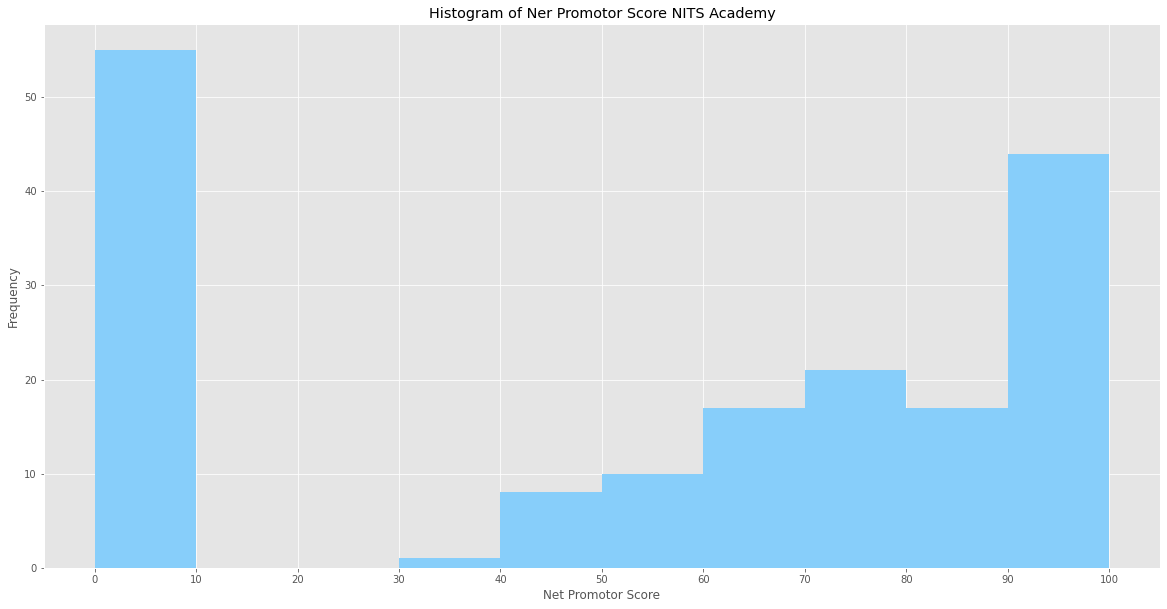

In [441]:
count, bin_edges = np.histogram(data_NITS['Net Promotor Score'], 10)
ax = data_NITS['Net Promotor Score'].plot(kind='hist',
                                             figsize=(20, 10),
                                             bins=10,
                                             xticks=bin_edges,
                                             color=['lightskyblue']
                                             )

ax.set_title('Histogram of Ner Promotor Score NITS Academy')
ax.set_xlabel('Net Promotor Score')
plt.show()

#### Dari semua pelatihan NITS Academy selama 2020, masih banyak pelatihan yang mendapatkan NPS sangat rendah (Detractor) yaitu 0-10 hingga mencapai lebih dari 50 pelatihan. Meskipun demikian tidak dipungkiri bahwa pelatihan dengan NPS Promotor (90-100) merupakan mayoritas kedua dengan total lebih dari 40 pelatihan.

# Pie Chart

In [10]:
data_category = data_pelatihan.groupby('Category', axis=0)['JML Peserta'].sum()

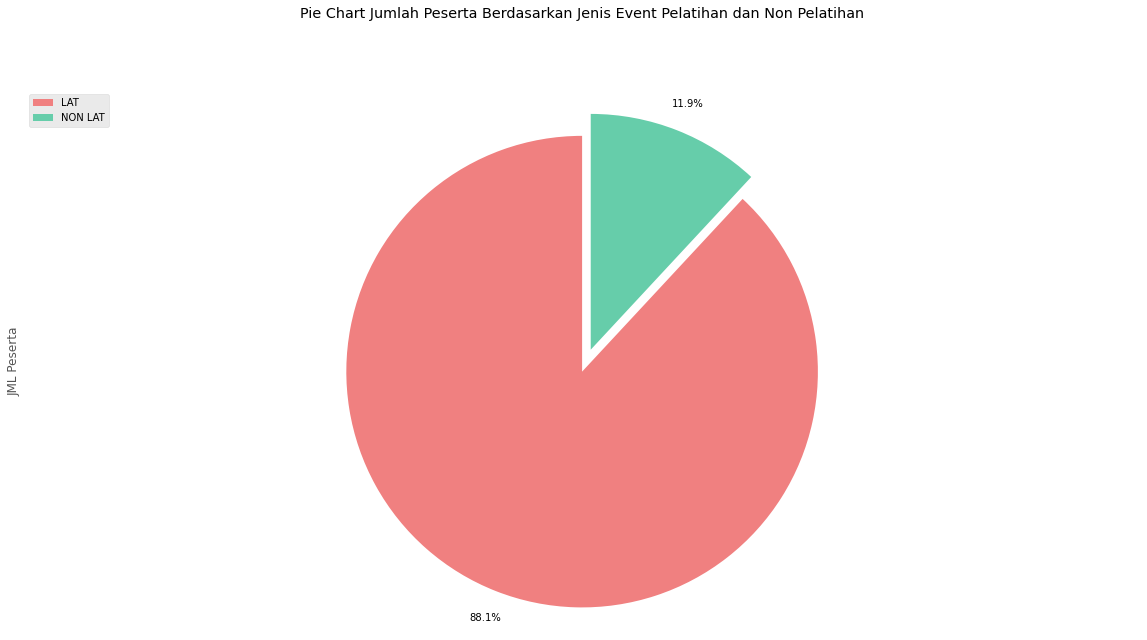

In [461]:
data_Pie = data_category.plot(kind='pie',
                      figsize=(20, 10),
                      autopct='%1.1f%%', 
                      startangle=90,
                        labels=None,
                      pctdistance=1.12,
                      colors=['lightcoral', 'mediumaquamarine'],
                      explode=[0, 0.1]
                      )

data_Pie.set_title('Pie Chart Jumlah Peserta Berdasarkan Jenis Event Pelatihan dan Non Pelatihan', y=1.12) 

data_Pie.axis('equal') 

data_Pie.legend(labels=data_category.index, loc='upper left') 

plt.show()

#### Selama 2020, Telkom Corporate University lebih banyak memanggil peserta untuk event berbasis pelatihan yaitu sebanyak 88,1% dibandingkan event non-pelatihan yang hanya sebanyak 11.9%

# Bar Chart

In [104]:
data_Academy = data_pelatihan.groupby("Academy Event", sort=False)["JML Peserta"].sum()

In [114]:
data_Academy.head(11)

Academy Event
CONSUMER              11559
NITS                   1780
DSP                    6370
BUSINNESS ENABLER     18619
WS & INTERNATIONAL     2665
ENTERPRISE             8102
KMCS                     16
LEADERSHIP             1177
GOFM                      0
PNC,LO, dan GS           79
MOBILE                    3
Name: JML Peserta, dtype: int64

Text(0.5, 0, 'Jumlah Peserta')

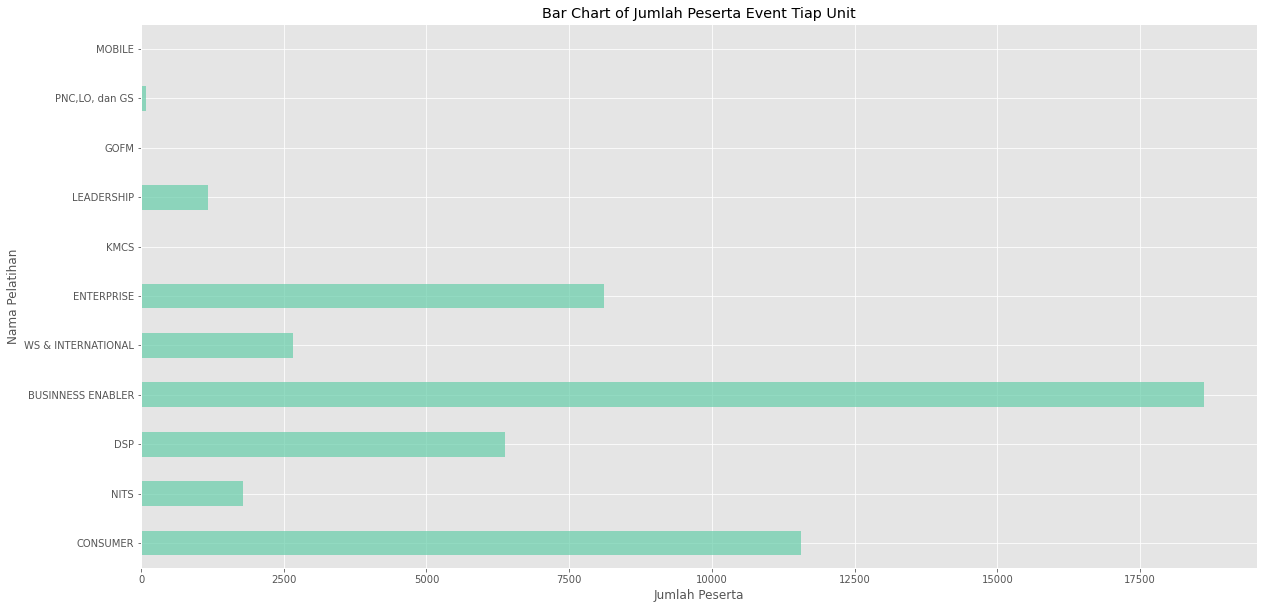

In [106]:
Barchart = data_Academy.plot(y='JML Peserta', x='Academy Event',
                         kind='barh',
                         alpha=0.7,
                         color='mediumaquamarine',
                         figsize=(20, 10))

Barchart.set_title('Bar Chart of Jumlah Peserta Event Tiap Unit')
Barchart.set_ylabel('Nama Pelatihan')
Barchart.set_xlabel('Jumlah Peserta')

#### Sepanjang 2020, Unit dengan pemanggilan peserta terbanyak adalah Business Enabler Academy dengan lebih dari 17.500 peserta, disusul oleh Consumer Academy dengan lebih dari 10.000.

## Box Plot

In [463]:
data_DSP = data_pelatihan[data_pelatihan["Academy Event"].isin(['DSP'])]

In [464]:
data_DSP[['JML Peserta','Academy Event']]

,JML Peserta,Academy Event
13,58,DSP
2,1,DSP
16,2,DSP
7,16,DSP
57,1,DSP
...,...,...
1522,81,DSP
1550,79,DSP
1456,1,DSP
1495,1,DSP


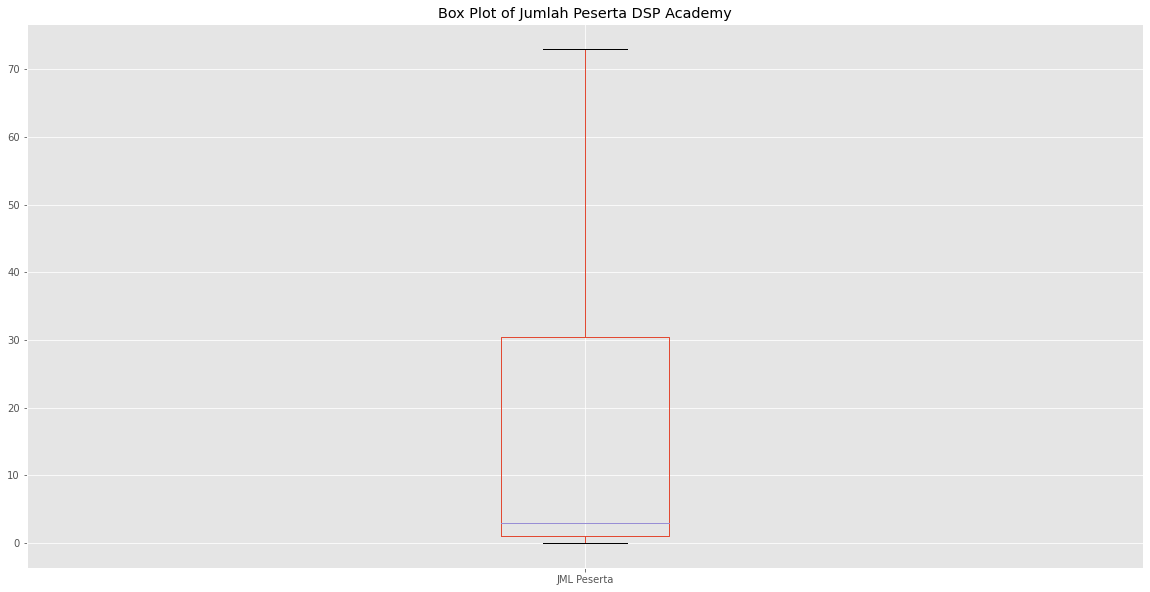

In [466]:
ax = data_DSP[['JML Peserta','Academy Event']].plot(kind='box',
                           figsize=(20, 10),
                           showfliers=False)
                            


ax.set_title('Box Plot of Jumlah Peserta DSP Academy') 

plt.show()

#### Dalam pelaksanaannya selama 2020, mayoritas pelatihan-pelatihan di DSP Academy memiliki peserta berkisar 1 hingga 30 peserta dengan maksimal jumlah peserta lebih dari 70 orang dalam sebuah pelatihan.

## Scatter Plot

In [246]:
new_data = data_pelatihan[data_pelatihan["Academy Event"].isin(['CONSUMER'])]

In [247]:
new_data

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score,Bulan
15,\tMentoring Leadership in Teritorry (week-6),90004514,NON LAT,Project,Bandung,Learning Area 3 / LO Bandung,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12
8,Klarifikasi HCD Plan 2021,90004548,NON LAT,Regular Meeting / Discussion,Bandung,Learning Area 3 / LO Bandung,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12
58,Management Project,80114090,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,84.21,0,85.79,0.00,84.74,63.16,84.21,88.42,84.84,12
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12
11,Strategic Planning Professional Level 1,80114096,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),NaN,Internal,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,Social Media Ads & Analytic,80111681,LAT,NaN,Semarang,Learning Area 4 Semarang,CONSUMER,Learning Area 4 Semarang,Internal,Internal,...,89.47,0,89.16,89.47,89.34,94.74,89.16,88.95,89.37,1
1465,Bangmat ITIL,90003756,NON LAT,Pengembangan Materi,Bandung,Learning Area 3 / LO Bandung,CONSUMER,Ruang Rapat Consumer Academy,Internal,Internal,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1554,Bangmat Pelatihan SCMT,90003736,NON LAT,Pengembangan Materi,Bandung,Learning Area 3 / LO Bandung,CONSUMER,R Rapat Consumer Academy,Internal,Internal,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1516,ORACLE Database Administration,80111642,LAT,NaN,Bandung,Learning Area 3 Bandung,CONSUMER,Learning Area 3 Bandung,Internal,Internal,...,87.65,0,87.50,90.00,87.35,58.82,89.18,91.88,86.94,1


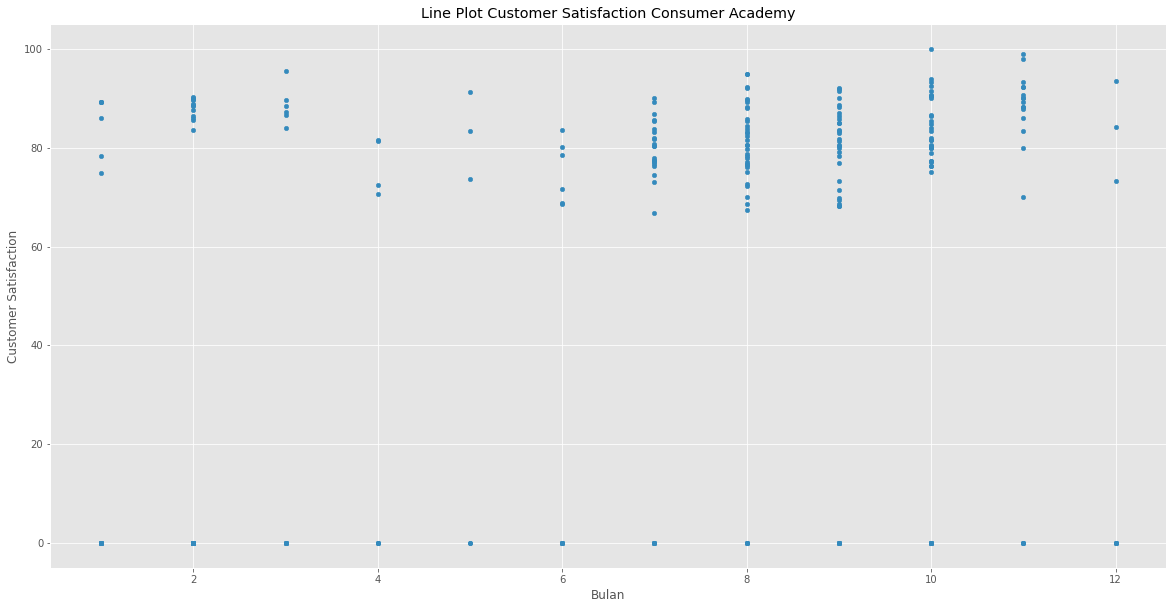

In [467]:
data_Jumlah = new_data[['Bulan', 'Customer Satisfaction']].plot(kind='scatter',
                                                x='Bulan',
                                                y='Customer Satisfaction',
                                                figsize=(20, 10))

data_Jumlah.set_title('Line Plot Customer Satisfaction Consumer Academy')
data_Jumlah.set_xlabel('Bulan')
data_Jumlah.set_ylabel('Customer Satisfaction')

plt.show()

#### Customer satisfaction pelatihan yang diselenggarakan Consumer Academy selama 2020, berkisar di angka 60-100. Pada bulan April 2020, dengan sedikitnya pelatihan, kepuasan peserta tergolong rendah, akan tetapi di akhir tahun khususnya Oktober November 2020 dengan semakin banyak pelatihan customer satisfaction peserta juga tergolong baik dengan mayoritas diangka lebih dari 80.

## WordCloud

In [120]:
from wordcloud import WordCloud, STOPWORDS

In [121]:
nama_pelatihan = open('dataset/Nama_Pelatihan.txt', 'r').read()

In [122]:
nama_pelatihan

'Social Media Ads & Analytic\nCISM\nProgrammer Development Course Amoeba\nBusiness Analytics Amoeba\nOnline UX Design Course Amoeba\nAspek Hukum dalam Pengelolaan Korporasi\nProposal Business AM Telkom Infra\nPerform Using OKR Batch 2\nKlarifikasi HCD Plan 2021\nRapat Pembahasan HCD Plan DBS 2021\nStrategic Business Analysis\nStrategic Planning Professional Level 1\nAWS Cert Solut Architect Assoc B4 2020\nOnBoarding Bootcamp DAB #16\nEvaluasi GPTP Online\n"\tMentoring Leadership in Teritorry (week-6)"\nCertified Blockchain Developer Amoeba\nInteraction Design Amoeba\nInteraction Design User Research Amoeba\nManaging Jira Cloud Projects Amoeba\nAgile & Scrum Dev Project Amoeba\nBlockchain Enterprise Proff Amoeba\nProduct Management Amoeba\nToT Core Values AKHLAK\nFinal Presentation ALP MDA Batch 2\nUnlocking Success Digital Transform B2\nCDCP(Certified Data Centre Professional)\nCoaching Mastery\nRisk Based Auditing\nUnlocking Success Digital Transform B1\nTransforming from Relief to Re

In [123]:
stopwords = set(STOPWORDS)

In [124]:
namapelatihan_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stopwords
)

namapelatihan_wc.generate(nama_pelatihan)

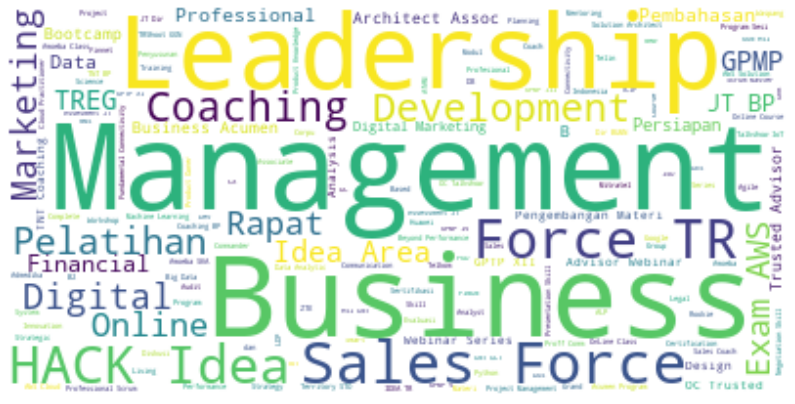

In [133]:
stopwords.add('Batch')
stopwords.add('Bangmat')
stopwords.add('Certified')

namapelatihan_wc.generate(nama_pelatihan)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(namapelatihan_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Apabila ditelaah melalui nama pelatihan, pelatihan di Telkom Corporate Univeristy selama 2020 mayoritas memuat kompetensi Management, Business dan Leadership

## Folium

In [141]:
loc = 'Telkom Corporate University'
title_map = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 

corpu_map = folium.Map(location =[-6.8711674, 107.5890189], zoom_start=15)
folium.Marker([-6.8711674, 107.5890189], popup='Telkom Corporate Univeristy').add_to(corpu_map)
corpu_map.get_root().html.add_child(folium.Element(title_map))

corpu_map

#### Peta Lokasi Telkom Corporate University